# Covid Analysis using Python


   ### The data showing the Covid cases of the world countries from 22nd January 2020 to 24th April 2020.Daily confirmed cases , Recovered cases and deaths are the attributes.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

### Read the File.

In [4]:
df1=pd.read_csv("F:/Datasets/covid_19_data.csv")

### Show the top 5 records.

In [5]:
df1.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


### Set SNo as the index.

In [6]:
df=df1.set_index("SNo")
df.head(10)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0


### Find the Dimension of Dataset.

In [7]:
df.ndim

2

### Find the Structure of the Dataset.

In [8]:
df.shape

(18327, 7)

### Find the datatypes of Columns.

In [9]:
df.dtypes

ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

### Show the name of the Titles.

In [10]:
df.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

### Information about the Dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18327 entries, 1 to 18327
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  18327 non-null  object 
 1   Province/State   9050 non-null   object 
 2   Country/Region   18327 non-null  object 
 3   Last Update      18327 non-null  object 
 4   Confirmed        18327 non-null  float64
 5   Deaths           18327 non-null  float64
 6   Recovered        18327 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.1+ MB


### Check the null values.

In [12]:
df.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

### Statistical Information about the Dataset.

In [13]:
df.describe()

,Confirmed,Deaths,Recovered
count,18327.000000,18327.000000,18327.000000
mean,3030.015551,180.680417,764.542424
std,15129.079515,1362.099905,5618.658958
min,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000
50%,101.000000,1.000000,2.000000
75%,674.500000,8.000000,71.000000
max,271590.000000,25969.000000,109800.000000


### Variance of the Dataset.

In [14]:
df.var()

Confirmed    2.288890e+08
Deaths       1.855316e+06
Recovered    3.156933e+07
dtype: float64

### Correlation of Dataset.

In [15]:
df.corr()

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.899834,0.660188
Deaths,0.899834,1.000000,0.564944
Recovered,0.660188,0.564944,1.000000


### Covariance of Dataset.

In [16]:
df.cov()

,Confirmed,Deaths,Recovered
Confirmed,2.288890e+08,1.854317e+07,5.611938e+07
Deaths,1.854317e+07,1.855316e+06,4.323619e+06
Recovered,5.611938e+07,4.323619e+06,3.156933e+07


### Country wise Covid Cases.

In [64]:
country=df.groupby("Country/Region").sum()
country

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,17827.0,553.0,1598.0
Albania,13401.0,645.0,5552.0
Algeria,52667.0,6914.0,14989.0
...,...,...,...
Western Sahara,106.0,0.0,10.0
Yemen,15.0,0.0,1.0
Zambia,1390.0,44.0,528.0


### Cases of India

In [72]:
country.loc["India"]

Confirmed    275072.0
Deaths         8757.0
Recovered     41824.0
Name: India, dtype: float64

### Cases of America

In [73]:
country.loc["US"]

Confirmed    14592049.0
Deaths         631505.0
Recovered     1058042.0
Name: US, dtype: float64

### Cases of Italy

In [77]:
country.loc["Italy"]

Confirmed    4936614.0
Deaths        597687.0
Recovered    1001832.0
Name: Italy, dtype: float64

### Cases of China

In [78]:
country.loc["Mainland China"]

Confirmed    6148522.0
Deaths        236016.0
Recovered    4235593.0
Name: Mainland China, dtype: float64

### The country having highest confirmed Cases.

In [51]:
df[df["Confirmed"]==df["Confirmed"].max()]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
18273,04/24/2020,New York,US,2020-04-25 06:31:19,271590.0,21411.0,0.0


### The country having highest Recovered Cases.

In [60]:
df[df["Recovered"]==df["Recovered"].max()]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
18070,04/24/2020,NaN,Germany,2020-04-25 06:31:19,154999.0,5760.0,109800.0


### The country having highest Deaths.

In [61]:
df[df["Deaths"]==df["Deaths"].max()]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
18089,04/24/2020,NaN,Italy,2020-04-25 06:31:19,192994.0,25969.0,60498.0


### Country wise Death Cases

In [31]:
death_country=country["Deaths"].max()
death_country

Country/Region
 Azerbaijan                         0.0
('St. Martin',)                     0.0
Afghanistan                        43.0
Albania                            27.0
Algeria                           415.0
                                  ...  
Western Sahara                      0.0
Yemen                               0.0
Zambia                              3.0
Zimbabwe                            4.0
occupied Palestinian territory      0.0
Name: Deaths, Length: 220, dtype: float64

### Country wise Recovered Cases

In [32]:
recovery_country=country["Recovered"].max()
recovery_country

Country/Region
 Azerbaijan                          0.0
('St. Martin',)                      0.0
Afghanistan                        188.0
Albania                            394.0
Algeria                           1408.0
                                   ...  
Western Sahara                       5.0
Yemen                                1.0
Zambia                              37.0
Zimbabwe                             2.0
occupied Palestinian territory       0.0
Name: Recovered, Length: 220, dtype: float64

### Covid Cases of India

In [58]:
india = df.loc[df["Country/Region"]=="India"]
india

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
431,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0
492,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
548,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
608,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
673,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
...,...,...,...,...,...,...,...
16804,04/20/2020,NaN,India,2020-04-20 23:44:50,18539.0,592.0,3273.0
17124,04/21/2020,NaN,India,2020-04-21 23:39:09,20080.0,645.0,3975.0
17444,04/22/2020,NaN,India,2020-04-22 23:38:57,21370.0,681.0,4370.0


### Distribution Graph of Confirmed Cases

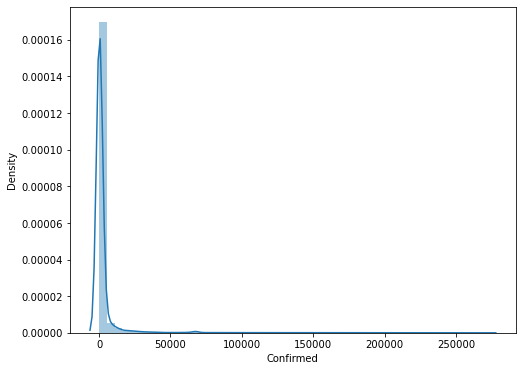

In [84]:
plt.figure(figsize=(8,6))
sns.distplot(df["Confirmed"])
plt.show()

### Distribution Graph of Death Cases

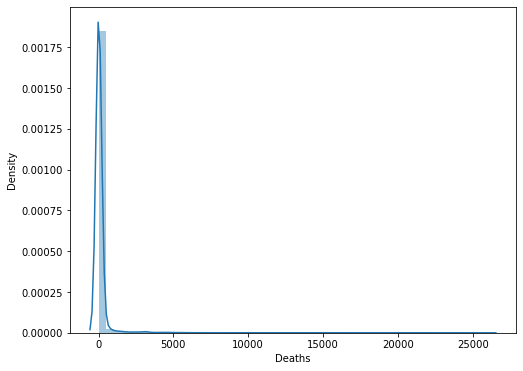

In [130]:
plt.figure(figsize=(8,6))
sns.distplot(df["Deaths"])
plt.show()

### Pairplot of Covid Cases

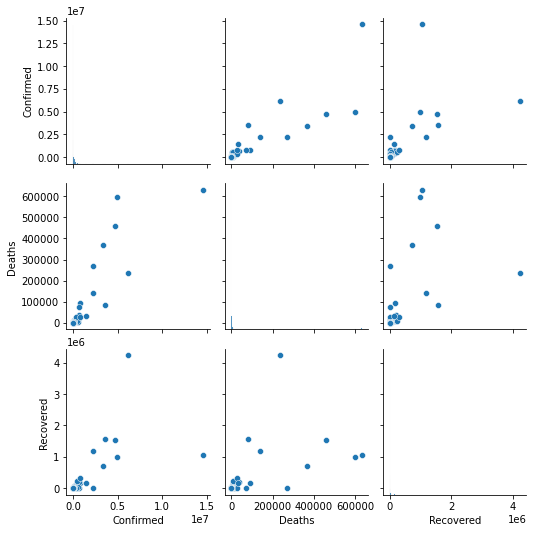

In [87]:
sns.pairplot(country)

### Scatterplot of Confirmed and Death Cases

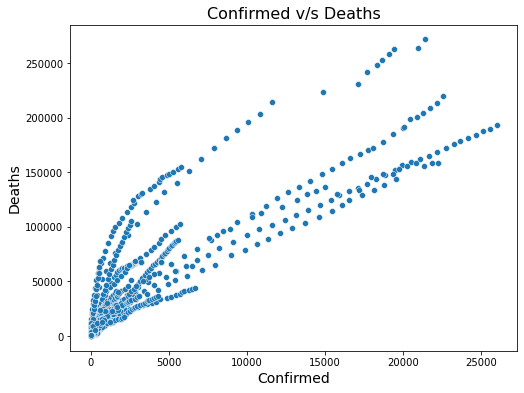

In [113]:
plt.figure(figsize=(8,6))
sns.scatterplot(y=df["Confirmed"],x=df["Deaths"])
plt.title("Confirmed v/s Deaths",size=16)
plt.ylabel("Deaths",size=14)
plt.xlabel("Confirmed",size=14)
plt.show()

### Regression Plot of Confirmed and Death Cases

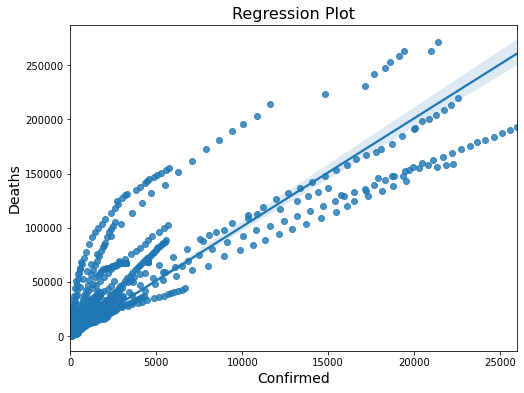

In [115]:
plt.figure(figsize=(8,6))
sns.regplot(y=df["Confirmed"],x=df["Deaths"])
plt.title("Regression Plot",size=16)
plt.ylabel("Deaths",size=14)
plt.xlabel("Confirmed",size=14)
plt.show()

### Heat Map Shows the relationships of Covid Cases

<AxesSubplot:>

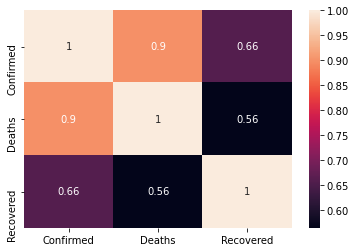

In [90]:
sns.heatmap(df.corr(),annot=True)

In [116]:
x=df.iloc[:,-3:-2].values
y=df.iloc[:,5].values

In [118]:
x

array([[1.000e+00],
       [1.400e+01],
       [6.000e+00],
       ...,
       [1.100e+01],
       [1.850e+02],
       [1.268e+03]])

In [119]:
y

array([0., 0., 0., ..., 0., 2., 1.])

### Performimg the T-Test

#### Train-Test-Split Evaluation

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [121]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16494, 1)
(1833, 1)
(16494,)
(1833,)


In [122]:
print(np.mean(x_train))
print(np.mean(x_test))
print(np.mean(y_train))
print(np.mean(y_test))

2984.7734933915362
3437.1200218221493
176.48453983266643
218.4364429896345


In [123]:
l=LinearRegression()
l.fit(x_train,y_train)
print("train test complete")

train test complete


In [124]:
y_pred=l.predict(x_test)

In [125]:
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

Mean Absolute Error 161.26302799705851


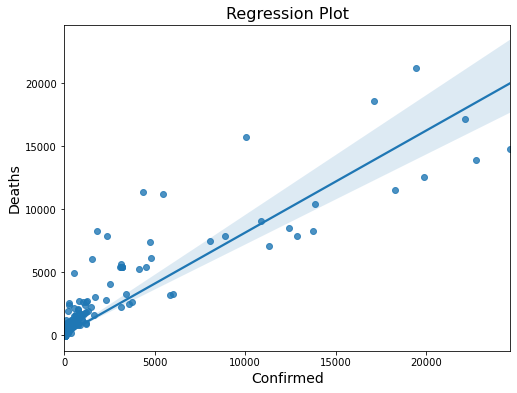

In [126]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test,y=y_pred)
plt.title("Regression Plot",size=16)
plt.ylabel("Deaths",size=14)
plt.xlabel("Confirmed",size=14)
plt.show()

## Conclusion

### The covid Cases are increasing day by day and also the deaths.On 22nd January 2020 at the Anhui province of Mainland China the first covid case was reported. By the end of 24th April 2020,United States of America has the highest number of confirmed cases.Germany has the highest number of recoveries from the covid and Italy lost most people due to covid. 